In [1]:
#Import relevant packages/libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import scipy.stats as st
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import rankdata
from scipy.stats import skew


#Read csv file
data = pd.read_csv('Responses.csv') 
pd.set_option('display.max_rows', None) #To display all of the columns here
display(data.columns) 

Index(['Tijdstempel', 'Have you participated in this survey before?',
       'Do you use the UberEats food delivery application on your phone?',
       'What is your age?', 'What is your gender?',
       'Where do you currently live?', 'What is your highest education level?',
       'What is your occupation?', 'What is your income level?',
       'Does the UberEats application send you push notifications about ordering food?',
       'The push notifications by UberEats have an influence on me. ',
       'The push notifications by UberEats are convincing.',
       'The push notifications by UberEats are personally relevant for me.',
       'Do not choose the option yes. This is to make sure you are paying attention.',
       'The push notifications by UberEats make me order food on UberEats more often.',
       'I am able to consume fruits and vegetables in most of my meals.',
       'I am able to eat a variety of healthy foods to keep my diet balanced.',
       'Based on my knowledge o

In [2]:
# 1. DATA CLEANING

# 1.1 Deleting responses which did not comply with the study requirements and responses which did not pass the attention tests.

# #All responses of people who have already filled in the survey earlier should be deleted #then: delete column
column_name1 = 'Have you participated in this survey before?'
value1 ='Yes'

#All responses of people who do not use UberEats on their phone should be deleted #then: delete column
column_name2 = 'Do you use the UberEats food delivery application on your phone?'
value2 ='No'

# #All responses of people who do not receive push notifications by UberEats should be deleted #then: delete column
column_name3 = 'Does the UberEats application send you push notifications about ordering food?'
value3 ='No'

#All responses of people who gave the wrong response for the first test question should be deleted #then: delete column
column_name4 = 'Do not choose the option yes. This is to make sure you are paying attention.'
value4 ='Yes'

# #All responses of people who gave the wrong response for the second test question should be deleted #then: delete column
column_name5 = 'If you are paying attention, choose number 4'
value5_1 = 1 
value5_2 = 2 
value5_3 = 3
value5_5 = 5

#All responses of people who are under 18 years old should be deleted #keep column
column_name6 = 'What is your age?'
value6 = 'Under 18'

#All responses of people who do not reside in a country where UberEats operates should be deleted #keep column
UberEatsCountries = ['Australia', 'Belgium','Canada','Chile','Costa Rica','Dominican Republic','Ecuador','El Salvador','France','Germany','Guatemala','Ireland','Italy','Japan','Kenya','Mexico','Netherlands','New Zealand','Panama','Poland','Portugal','South Africa','Spain','Sri Lanka','Sweden','Switzerland','Taiwan','United Kingdom','United States']
column_name7 = 'Where do you currently live?'

#Remove all aforementioned responses from dataset
data = data[data[column_name1] != value1]
data = data[data[column_name2] != value2]
data = data[data[column_name3] != value3]
data = data[data[column_name4] != value4]
data = data[data[column_name5] != value5_1]
data = data[data[column_name5] != value5_2]
data = data[data[column_name5] != value5_3]
data = data[data[column_name5] != value5_5]
data = data[data[column_name6] != value6]

for value in data[column_name7]:  #Removing countries that are not included
    if value in UberEatsCountries:
        data=data
    else:
        data = data[data[column_name7] != value]
        #print(value)
            
#Now remove all requirements and attention test question columns which are not necessary anymore in further analysis
data = data.drop(column_name1, axis=1)
data = data.drop(column_name2, axis=1)
data = data.drop(column_name3, axis=1)
data = data.drop(column_name4, axis=1)
data = data.drop(column_name5, axis=1)

#Remove date and time column, not necessary for analysis
data = data.drop('Tijdstempel', axis=1)

#Reset index of the DataFrame
data = data.reset_index(drop=True)

#Number of responses now
print(len(data))

173


In [3]:
# 1.2 RENAME COLUMNS

#Old column names
old_demographics_columns = ['What is your age?',
                      'What is your gender?',
                      'Where do you currently live?', 
                      'What is your highest education level?',
                      'What is your occupation?',
                      'What is your income level?']  

old_variable1_columns = ['The push notifications by UberEats have an influence on me. ',
                      'The push notifications by UberEats are convincing.',
                      'The push notifications by UberEats are personally relevant for me.', 
                      'The push notifications by UberEats make me order food on UberEats more often.']  

old_variable2_columns = ['I am able to consume fruits and vegetables in most of my meals.', 
                      'I am able to eat a variety of healthy foods to keep my diet balanced.', 
                      'Based on my knowledge of nutrition, I am able to choose healthy foods at restaurants and from stores.', 
                      'I am able to modify recipes to make them healthier.', 
                      'I am able to choose recipes based on nutritional value.',
                      'If I choose to indulge in unhealthy food, I am able to appropriately compensate later.',
                      'When I feel hungry, I am able to easily choose healthy food over less healthy options.']  

#New column names
demographics_columns = ['Age', 'Gender', 'Country', 'Education','Occupation','Income']  
variable1_columns = ['PP1', 'PP2', 'PP3', 'PP4']  
variable2_columns = ['HS1', 'HS2', 'HS3', 'HS4', 'HS5','HS6','HS7']  
all_variable_columns = ['PP1', 'PP2', 'PP3', 'PP4', 'HS1', 'HS2', 'HS3', 'HS4', 'HS5','HS6','HS7']  

#Rename the columns
data.rename(columns=dict(zip(old_demographics_columns, demographics_columns)), inplace=True)
data.rename(columns=dict(zip(old_variable1_columns, variable1_columns)), inplace=True)
data.rename(columns=dict(zip(old_variable2_columns, variable2_columns)), inplace=True)

#display(data)

#Number of responses
print(len(data))

173


In [4]:
#1.3 IDENTIFY AND HANDLE MISSING VALUES AND DUPLICATE ROWS

#Identify missing values
missing_values = data.isnull().sum()
print('Number of missing values:', missing_values.sum()) #No missing values found

#Identify duplicate rows
duplicate_rows = data.duplicated()
print('Number of duplicate rows:', duplicate_rows.sum()) #1 duplicate row found

#Remove rows with missing values
data = data.dropna()

#Remove duplicate rows
data = data.drop_duplicates()

#Reset index of the DataFrame
data = data.reset_index(drop=True)

#Number of responses
print(len(data))

#display(data)

Number of missing values: 0
Number of duplicate rows: 1
172


In [5]:
#1.4 CALCULATE COMPOSITE LIKERT SCALE SCORES FOR EACH VARIABLE [CAN BE SUM OR AVERAGE -> AVERAGE CHOSEN]

#Average perceived persuasiveness score for each respondent 
average_scores_PP = data[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)

#Average Healthy eating self-efficacy score for each respondent
average_scores_HS = data[['HS1', 'HS2', 'HS3', 'HS4','HS5','HS6','HS7']].mean(axis=1)

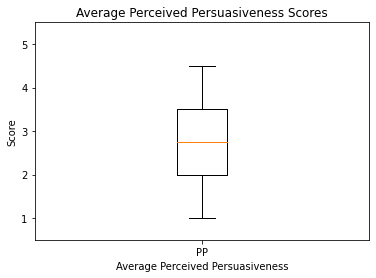

count    172.000000
mean       2.678779
std        0.850490
min        1.000000
25%        2.000000
50%        2.750000
75%        3.500000
max        4.500000
dtype: float64

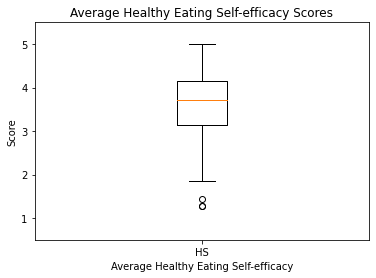

count    172.000000
mean       3.647841
std        0.778699
min        1.285714
25%        3.142857
50%        3.714286
75%        4.142857
max        5.000000
dtype: float64

In [6]:
#1.5 BOXPLOTS OF STUDY VARIABLES PERCEIVED PERSUASIVENESS AND HEALTHY EATING SELF-EFFICACY TO IDENTIFY OUTLIERS

#Box plot of perceived persuasiveness scores
boxplot1 = plt.boxplot(average_scores_PP)
plt.xlabel('Average Perceived Persuasiveness')
plt.ylabel('Score')
plt.title('Average Perceived Persuasiveness Scores')
plt.xticks(ticks=range(1, 2), labels=['PP']) 
plt.ylim(0.5,5.5)
plt.show()

#Central tendency values perceived persuasiveness 
display(average_scores_PP.describe())

#Box plot of healthy eating self-efficacy scores
boxplot2 = plt.boxplot(average_scores_HS)
plt.xlabel('Average Healthy Eating Self-efficacy')
plt.ylabel('Score')
plt.title('Average Healthy Eating Self-efficacy Scores')
plt.xticks(ticks=range(1, 2), labels=['HS'])  
plt.ylim(0.5,5.5)
plt.show()

#Central tendency values healthy eating self-efficacy 
display(average_scores_HS.describe())

In [7]:
#1.6 IDENTIFY OUTLIERS

#Get the outlier data points of perceived persuasiveness scores
outlier_points1 = boxplot1['fliers'][0].get_data()[1]
outliers_indices1 = np.where(average_scores_PP.isin(outlier_points1))

print(outlier_points1) #there were no outliers found for perceived persuasiveness

#Get the outlier data points of healthy eating self-efficacy scores
outlier_points2 = boxplot2['fliers'][0].get_data()[1]
outliers_indices2 = np.where(average_scores_HS.isin(outlier_points2))

print(outliers_indices2)
print(outlier_points2)

[]
(array([  8,  13, 108], dtype=int64),)
[1.28571429 1.28571429 1.42857143]


In [8]:
#1.7 REMOVE OUTLIERS 

#Remove the outliers from the data
data_including_outliers = data
data = data.drop(data.index[outliers_indices2])

#Reset index of the DataFrame
data = data.reset_index(drop=True)

#display(data)
print('Final sample size', len(data))

Final sample size 169


In [9]:
#2.0 DESCRIPTIVE STATISTICS 

#Number of respondents and variables
number_of_observations = data.shape[0]
number_of_variables = data.shape[1]

#Variable names
variable_names = data.columns.tolist()

print('Number of Respondents:',number_of_observations)
print('Number of Variables:', number_of_variables)
print('Variable Names:', variable_names)

Number of Respondents: 169
Number of Variables: 17
Variable Names: ['Age', 'Gender', 'Country', 'Education', 'Occupation', 'Income', 'PP1', 'PP2', 'PP3', 'PP4', 'HS1', 'HS2', 'HS3', 'HS4', 'HS5', 'HS6', 'HS7']


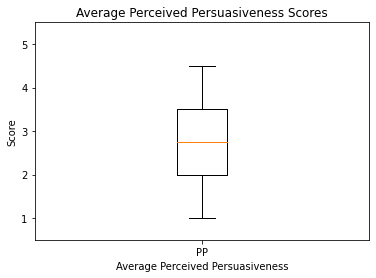

count    169.000000
mean       2.692308
std        0.844714
min        1.000000
25%        2.000000
50%        2.750000
75%        3.500000
max        4.500000
dtype: float64

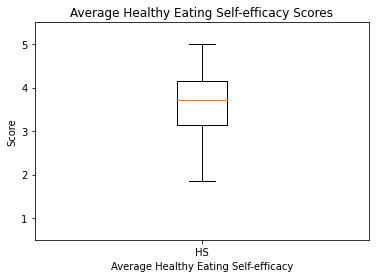

count    169.000000
mean       3.688926
std        0.720945
min        1.857143
25%        3.142857
50%        3.714286
75%        4.142857
max        5.000000
dtype: float64

In [10]:
#2.1 FINAL BOXPLOTS OF STUDY VARIABLES PERCEIVED PERSUASIVENESS AND HEALTHY EATING SELF-EFFICACY (WITHOUT OUTLIERS)

#Average perceived persuasiveness score for each respondent 
average_scores_PP = data[['PP1', 'PP2', 'PP3', 'PP4']].mean(axis=1)

#Average Healthy eating self-efficacy score for each respondent
average_scores_HS = data[['HS1', 'HS2', 'HS3', 'HS4','HS5','HS6','HS7']].mean(axis=1)

#Box plot of perceived persuasiveness scores
boxplot1 = plt.boxplot(average_scores_PP)
plt.ylim(0.5,5.5)
plt.xlabel('Average Perceived Persuasiveness')
plt.ylabel('Score')
plt.title('Average Perceived Persuasiveness Scores')
plt.xticks(ticks=range(1, 2), labels=['PP']) 
plt.show()

#Central tendency values perceived persuasiveness 
display(average_scores_PP.describe())

#Box plot of healthy eating self-efficacy scores
boxplot2 = plt.boxplot(average_scores_HS)
plt.ylim(0.5,5.5)
plt.xlabel('Average Healthy Eating Self-efficacy')
plt.ylabel('Score')
plt.title('Average Healthy Eating Self-efficacy Scores')
plt.xticks(ticks=range(1, 2), labels=['HS'])  
plt.show()

#Central tendency values healthy eating self-efficacy 
display(average_scores_HS.describe())

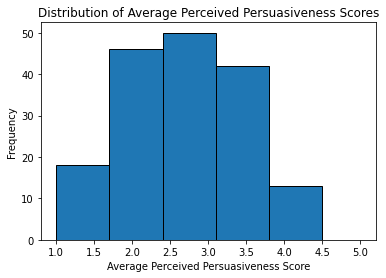

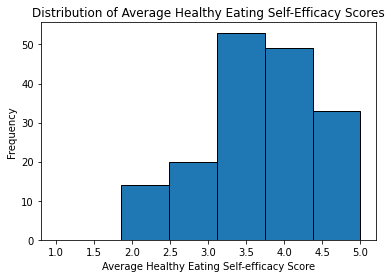

In [11]:
#2.2 HISTOGRAMS OF THE TWO STUDY VARIABLES

#Histogram of the average Perceived Persuasiveness scores
plt.hist(average_scores_PP, bins=5, edgecolor='black')
plt.xlim(0.8,5.2)
plt.xlabel('Average Perceived Persuasiveness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Perceived Persuasiveness Scores')
plt.show()

#Histogram of the average Healthy Eating Self-efficacy scores
plt.hist(average_scores_HS, bins=5, edgecolor='black')
plt.xlim(0.8,5.2)
plt.xlabel('Average Healthy Eating Self-efficacy Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Healthy Eating Self-Efficacy Scores')
plt.show()

In [12]:
# 2.3 DESCRIPTIVE STATISTICS OF DEMOGRAPHIC VARIABLES 

#Create table for descriptive statistics of demographic variables (latex)

demographics = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Country': 'Country',
    'Education': 'Education',
    'Occupation': 'Occupation',
    'Income': 'Income'
}

rows = []
for demographic,column in demographics.items():
    categories = data[column].unique()
    #print(categories)
    response_counts = data[column].value_counts()
    #print(response_counts)
    response_percentage = round(response_counts/len(data[column])*100, 2)
    
    for category in response_counts.index:
        number_of_category_responses = response_counts[category]
        #print(number_of_category_responses)
        category_percentage = response_percentage[category]
        #print(category_percentage)
        rows.append([demographic, category, number_of_category_responses, category_percentage])

#Create DataFrame from the table rows
table_demographics = pd.DataFrame(rows, columns=['Demographic','Category','Number of respondents','Percentage of respondents'])
print(table_demographics)

   Demographic                 Category  Number of respondents  \
0          Age                    18-24                    124   
1          Age                    25-34                     40   
2          Age                    35-44                      3   
3          Age                    45-54                      1   
4          Age                    55-64                      1   
5       Gender                   Female                    117   
6       Gender                     Male                     51   
7       Gender                    Other                      1   
8      Country              Netherlands                    131   
9      Country           United Kingdom                      8   
10     Country                  Belgium                      8   
11     Country                Australia                      4   
12     Country                    Spain                      3   
13     Country             South Africa                      3   
14     Cou

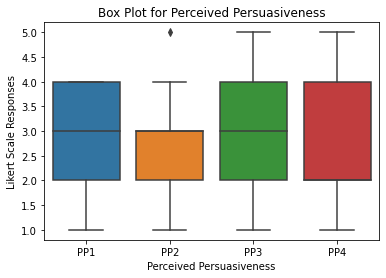

PP1    3.0
PP2    3.0
PP3    3.0
PP4    2.0
dtype: float64

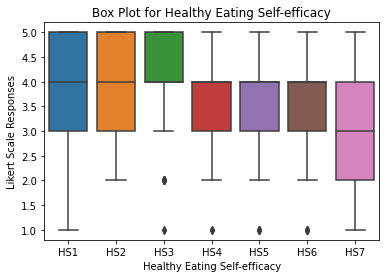

HS1    4.0
HS2    4.0
HS3    4.0
HS4    4.0
HS5    4.0
HS6    4.0
HS7    3.0
dtype: float64

In [13]:
# 2.4 BOXPLOT WITH CENTRAL TENDENCY FOR LIKERT TYPE ITEMS FROM STUDY VARIABLES (ONLY MEDIAN) ### NOT USING THIS IN THESIS ###

#Box plots for Likert type items Perceived Persuasiveness
sns.boxplot(data=data[variable1_columns])
plt.xlabel('Perceived Persuasiveness')
plt.ylabel('Likert Scale Responses')
plt.title('Box Plot for Perceived Persuasiveness')
plt.xticks(range(len(variable1_columns)), variable1_columns)
plt.plot()
plt.show()

#Central tendency values for Likert type items Perceived Persuasiveness
display(data[variable1_columns].median())

#Box plot for Likert type items Healthy Eating Self-efficacy
sns.boxplot(data=data[variable2_columns])
plt.xlabel('Healthy Eating Self-efficacy')
plt.ylabel('Likert Scale Responses')
plt.title('Box Plot for Healthy Eating Self-efficacy')
plt.xticks(range(len(variable2_columns)), variable2_columns)
plt.plot()
plt.show()

#Central tendency values for Likert type items Healthy Eating Self-efficacy
display(data[variable2_columns].median())

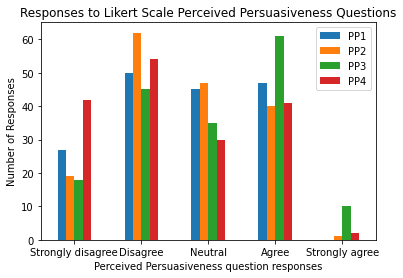

In [14]:
#2.5 FREQUENCY DISTRIBUTION FROM RESPONSES: BAR CHARTS AND HORIZONTAL STACKED BAR CHARTS

#Bar chart for variable 1: Perceived Persuasiveness ### NOT USING THIS IN THESIS ###
likert_counts = data[variable1_columns].apply(pd.Series.value_counts) 
likert_counts.plot(kind='bar', rot=0)
plt.ylabel('Number of Responses')
plt.xlabel('Perceived Persuasiveness question responses')
plt.title('Responses to Likert Scale Perceived Persuasiveness Questions')
xticks = range(len(likert_counts)) 
legend_labels = ['Strongly disagree','Disagree', 'Neutral','Agree','Strongly agree'] 
plt.xticks(xticks, legend_labels)
plt.plot()

#Save the plot as a PDF
plt.savefig('plot3.pdf', format='pdf', bbox_inches='tight')

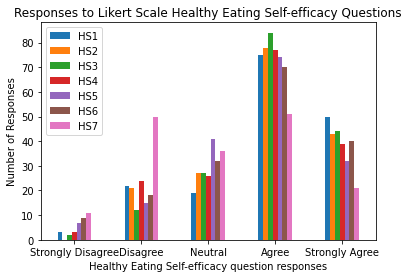

In [15]:
#Bar chart for variable 2: Healthy Eating Self-efficacy 

### NOT USING THIS IN THESIS ###

likert_counts = data[variable2_columns].apply(pd.Series.value_counts)
likert_counts.plot(kind='bar',rot=0)
plt.ylabel('Number of Responses')
plt.xlabel('Healthy Eating Self-efficacy question responses')
plt.title('Responses to Likert Scale Healthy Eating Self-efficacy Questions')
xticks = range(len(likert_counts))  
legend_labels = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree']
plt.xticks(xticks, legend_labels)
plt.plot()

#Save the plot as a PDF
plt.savefig('plot5.pdf', format='pdf', bbox_inches='tight')

        1     2     3     4     5
PP1  27.0  50.0  45.0  47.0   NaN
PP2  19.0  62.0  47.0  40.0   1.0
PP3  18.0  45.0  35.0  61.0  10.0
PP4  42.0  54.0  30.0  41.0   2.0


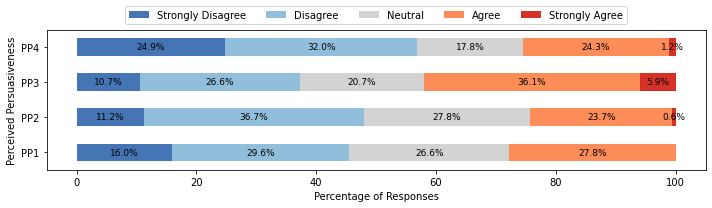

In [16]:
#Frequency distribution: Horizontal stacked bar chart for variable 1: Perceived Persuasiveness

legend_labels = ['Strongly Disagree','Disagree','Neutral','Agree','Strongly Agree']
likert_counts = data[variable1_columns].apply(pd.Series.value_counts)

#Transpose the dataframe
likert_counts = likert_counts.transpose()
print(likert_counts)

#Percentages per category
likert_percentages = likert_counts.div(likert_counts.sum(axis=1), axis=0)*100
#print(likert_percentages)

#Stacked horizontal bar chart
colors = ['#4575b4','#91bfdb','lightgrey','#fc8d59','#d73027']
graph = likert_percentages.plot(kind='barh', stacked=True, color=colors, rot=0)

#Add percentage labels to bars
for i, category in enumerate(likert_percentages.index):
    total_width = 0
    for response in likert_percentages.columns:
        percentage = likert_percentages.loc[category,response]
        graph.annotate(f'{percentage:.1f}%',(total_width+percentage/2, i),ha='center',va='center',fontsize=9,color='black')
        total_width += percentage

plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.001), ncol=len(legend_labels))
plt.xlim(-5, 105)
plt.xlabel('Percentage of Responses')
plt.ylabel('Perceived Persuasiveness')
plt.gcf().set_size_inches(10, 3) 
plt.tight_layout()
plt.show()

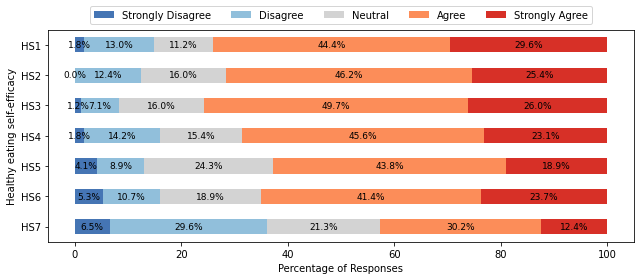

In [17]:
#Frequency distribution: Horizontal stacked bar chart for Variable 2: Healthy Eating Self-efficacy

likert_counts = data[variable2_columns].apply(pd.Series.value_counts)
#print(likert_counts) 

#There is a Nan value present for HS2, 0 respondents filled in strongly disagree, needs to be replaced by 0.
#Replace NaN values with zero

likert_counts = likert_counts.fillna(0)
#print(likert_counts)

#Transpose the dataframe
likert_counts = likert_counts.transpose()

#Percentages per category
likert_percentages = likert_counts.div(likert_counts.sum(axis=1), axis=0)*100
#print(likert_percentages)

#Stacked horizontal bar chart
graph = likert_percentages.plot(kind='barh',stacked=True,color=colors,rot=0)

#Add percentage labels to bars
for i, category in enumerate(likert_percentages.index):
    total_width = 0
    for response in likert_percentages.columns:
        percentage = likert_percentages.loc[category,response]
        graph.annotate(f'{percentage:.1f}%',(total_width+percentage/2, i),ha='center',va='center',fontsize=9,color='black')
        total_width += percentage

plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, 1.001), ncol=len(legend_labels))
plt.xlim(-5, 105)
plt.xlabel('Percentage of Responses')
plt.ylabel('Healthy eating self-efficacy')
plt.yticks(range(len(likert_percentages.index)), likert_percentages.index)
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(9, 4)  
plt.tight_layout()
plt.show()

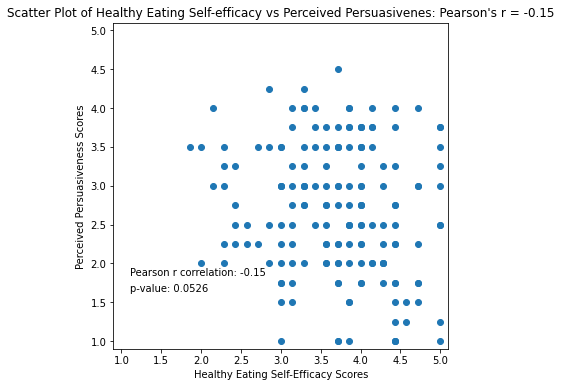

The correlation is not statistically significant.


In [18]:
#4.0 INFERENTIAL STATISTICS

#Pearson's r correlation coefficient and p-value calculation
correlation, p_value = st.pearsonr(data[variable2_columns].mean(axis=1), data[variable1_columns].mean(axis=1))

#Scatter plot of the data
plt.figure(figsize=(6, 6))
plt.scatter(data[variable2_columns].mean(axis=1), data[variable1_columns].mean(axis=1))
plt.xlabel('Healthy Eating Self-Efficacy Scores')
plt.ylabel('Perceived Persuasiveness Scores')
plt.title("Scatter Plot of Healthy Eating Self-efficacy vs Perceived Persuasivenes: Pearson's r = -0.15")
plt.xlim(0.9,5.1)
plt.ylim(0.9,5.1)

#Display the correlation coefficient and p-value in the scatterplot
plt.text(0.05, 0.25, 'Pearson r correlation: {:.2f}'.format(correlation),
         transform=plt.gca().transAxes, va='top')
plt.text(0.05, 0.20, 'p-value: {:.4f}'.format(p_value),
         transform=plt.gca().transAxes, va='top')
plt.show()

significance_level = 0.05

#Check the significance of the correlation
if p_value < significance_level:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

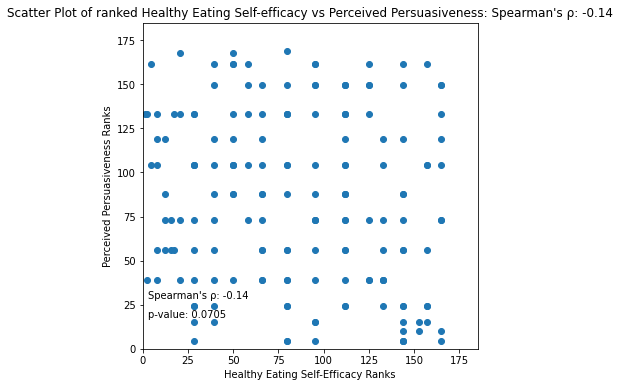

The correlation is not statistically significant.


In [19]:
#Spearman's correlation coefficient and p-value calculation
correlation, p_value = st.spearmanr(data[variable2_columns].mean(axis=1), data[variable1_columns].mean(axis=1))

#Scatter plot of the ranked data
plt.figure(figsize=(6, 6))
plt.xlabel('Healthy Eating Self-Efficacy Ranks')
plt.ylabel('Perceived Persuasiveness Ranks')
plt.title("Scatter Plot of ranked Healthy Eating Self-efficacy vs Perceived Persuasiveness: Spearman's \u03C1: {:.2f}".format(correlation))
variable2_ranked = rankdata(data[variable2_columns].mean(axis=1))
variable1_ranked = rankdata(data[variable1_columns].mean(axis=1))
plt.scatter(variable2_ranked,variable1_ranked)
plt.xlim(0,185)
plt.ylim(0,185)

#Display the correlation coefficient and p-value in the scatterplot
plt.text(0.015, 0.18, "Spearman's \u03C1: {:.2f}".format(correlation),
         transform=plt.gca().transAxes, va='top')
plt.text(0.015, 0.12, 'p-value: {:.4f}'.format(p_value),
         transform=plt.gca().transAxes, va='top')
plt.show()

#Check the significance of the correlation
if p_value < significance_level:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

In [20]:
#Check for normality in distributions using Shapiro-Wilk test

#Shapiro-Wilk test Healthy eating self-efficacy
statistic, p_value = shapiro(data[variable2_columns].mean(axis=1))
print(statistic, p_value )
if p_value > significance_level:
    print("The Healthy eating self-efficacy data is normally distributed.")
else:
    print("The Healthy eating self-efficacy data is not normally distributed.")
    
#Shapiro-Wilk test Perceived Persuasiveness
statistic, p_value = shapiro(data[variable1_columns].mean(axis=1))
significance_level = 0.05
print(statistic, p_value)

#Check the significance of the correlation
if p_value > significance_level:
    print("The Perceived Persuasiveness data is normally distributed.")
else:
    print("The Perceived Persuasiveness data is not normally distributed.")

0.9765089154243469 0.005740886554121971
The Healthy eating self-efficacy data is not normally distributed.
0.9706080555915833 0.001187276910059154
The Perceived Persuasiveness data is not normally distributed.


In [21]:
#Check skewness of the distribution

skewness2 = skew(data[variable2_columns].mean(axis=1))
print('Skewness Healthy eating self-efficacy data {:.2f}:'.format(skewness2))

skewness1 = skew(data[variable1_columns].mean(axis=1))
print('Skewness Perceived Persuasiveness data {:.2f}:'.format(skewness1))

Skewness Healthy eating self-efficacy data -0.32:
Skewness Perceived Persuasiveness data -0.12:


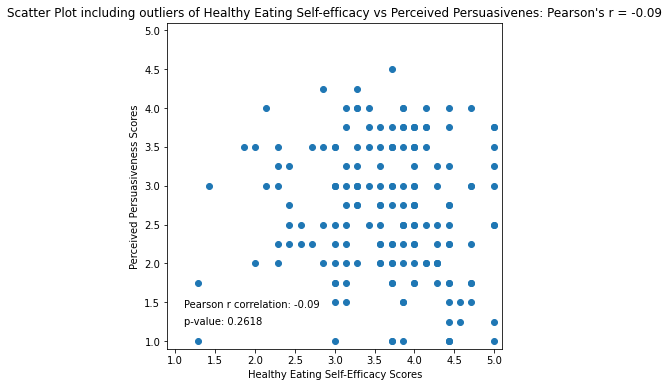

The correlation is not statistically significant.


In [22]:
#INFERENTIAL STATISTICS WHEN OUTLIERS ARE INCLUDED

#Pearson's r correlation coefficient and p-value calculation
correlation, p_value = st.pearsonr(data_including_outliers[variable2_columns].mean(axis=1), data_including_outliers[variable1_columns].mean(axis=1))

#Scatter plot of the data
plt.figure(figsize=(6, 6))
plt.scatter(data_including_outliers[variable2_columns].mean(axis=1), data_including_outliers[variable1_columns].mean(axis=1))
plt.xlabel('Healthy Eating Self-Efficacy Scores')
plt.ylabel('Perceived Persuasiveness Scores')
plt.title("Scatter Plot including outliers of Healthy Eating Self-efficacy vs Perceived Persuasivenes: Pearson's r = {:.2f}".format(correlation))
plt.xlim(0.9,5.1)
plt.ylim(0.9,5.1)

#Display the correlation coefficient and p-value in the scatterplot
plt.text(0.05, 0.15, 'Pearson r correlation: {:.2f}'.format(correlation),
         transform=plt.gca().transAxes, va='top')
plt.text(0.05, 0.10, 'p-value: {:.4f}'.format(p_value),
         transform=plt.gca().transAxes, va='top')
plt.show()

#Check the significance of the correlation
if p_value < significance_level:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

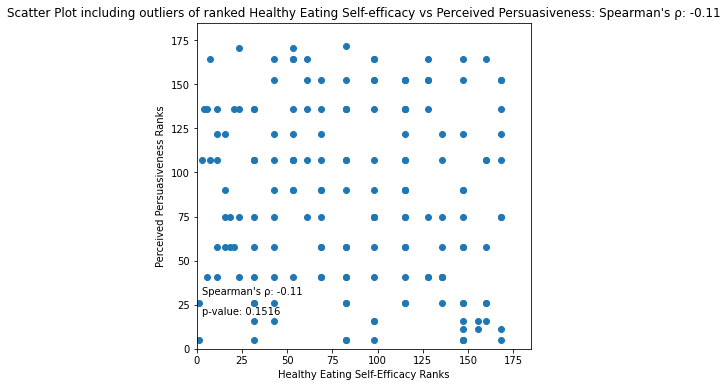

The correlation is not statistically significant.


In [23]:
#Spearman's correlation coefficient and p-value calculation
correlation, p_value = st.spearmanr(data_including_outliers[variable2_columns].mean(axis=1), data_including_outliers[variable1_columns].mean(axis=1))

#Create scatter plot of the ranked data
plt.figure(figsize=(6, 6))
plt.xlabel('Healthy Eating Self-Efficacy Ranks')
plt.ylabel('Perceived Persuasiveness Ranks')
plt.title("Scatter Plot including outliers of ranked Healthy Eating Self-efficacy vs Perceived Persuasiveness: Spearman's \u03C1: {:.2f}".format(correlation))
variable2_ranked = rankdata(data_including_outliers[variable2_columns].mean(axis=1))
variable1_ranked = rankdata(data_including_outliers[variable1_columns].mean(axis=1))
plt.scatter(variable2_ranked, variable1_ranked)
plt.xlim(0,185)
plt.ylim(0,185)

#Display the correlation coefficient and p-value in the scatterplot
plt.text(0.015, 0.19, "Spearman's \u03C1: {:.2f}".format(correlation),
         transform=plt.gca().transAxes, va='top')
plt.text(0.015, 0.13, 'p-value: {:.4f}'.format(p_value),
         transform=plt.gca().transAxes, va='top')
plt.show()

#Check the significance of the correlation
if p_value < significance_level:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")